In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
iris = pd.read_csv("../Datasets/iris.csv")

In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

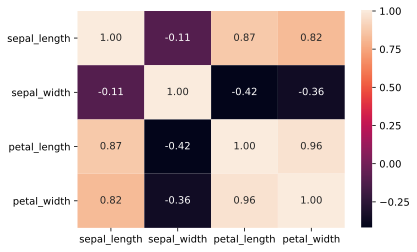

In [5]:
heat = sns.heatmap(iris.corr(),annot=True, fmt='.2f')

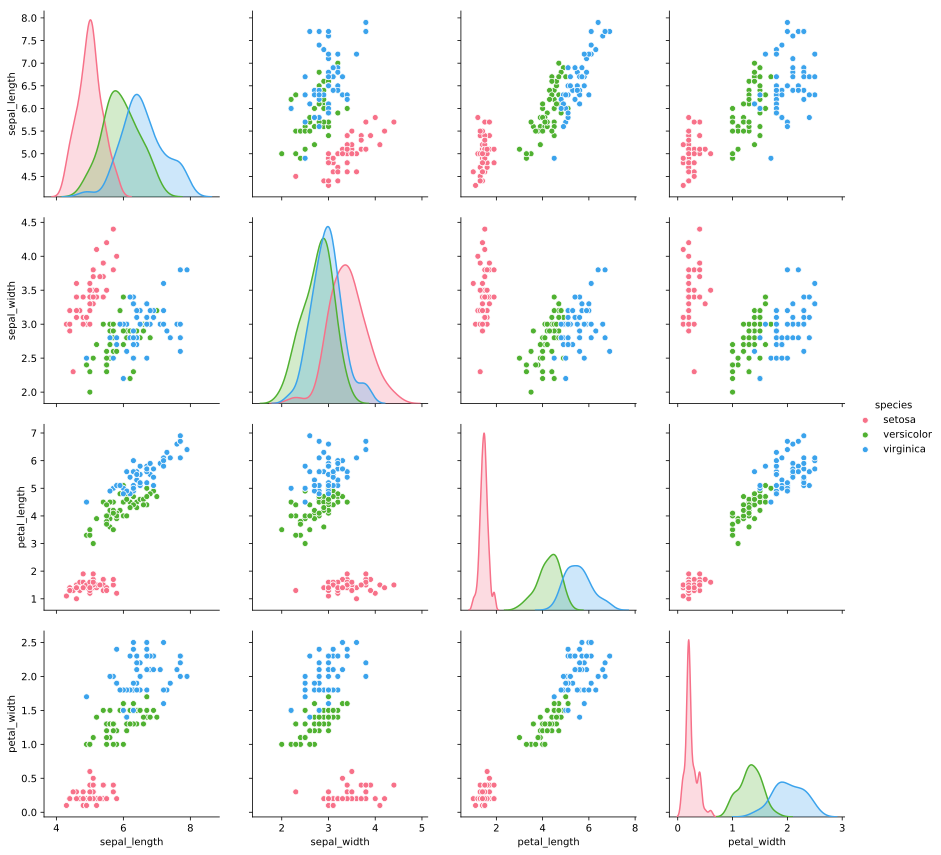

In [6]:
sns.pairplot(iris,height = 3,vars=["sepal_length","sepal_width","petal_length","petal_width"],hue="species",palette="husl")

In [7]:
y = iris.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = iris.iloc[0:100, [0, 2]].values

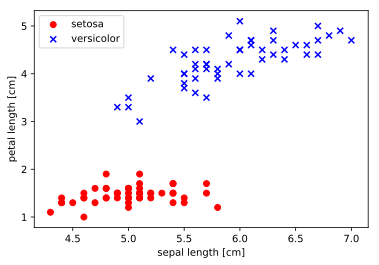

In [8]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Implementing Pereceptron Algorithm in Python using Perceptron Class

In [9]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

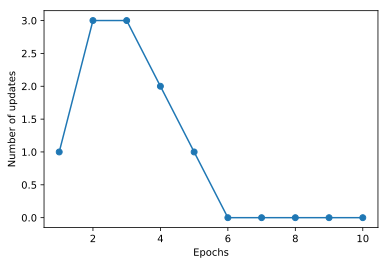

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

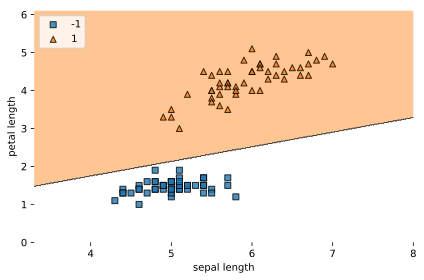

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=ppn, legend=2,)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

Sklearn Implementation of Perceptron

In [12]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
ppn = Perceptron(n_iter=100, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())


print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 3
Accuracy: 0.90


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [16]:
def report(predictions, Y_test, labels):
    print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
    print("\n")
    print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=labels))
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy:%.2f%%" %(accuracy*100.0))
    print('Misclassified samples: %d' % (Y_test != predictions).sum())
    return
report(y_pred, y_test, [str(i) for i in list(set(y))])

Confusion Matrix:

 [[10  0  0]
 [ 2  8  0]
 [ 0  1  9]]


Classification Report:

               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.89      0.80      0.84        10
           2       1.00      0.90      0.95        10

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30

Accuracy:90.00%
Misclassified samples: 3


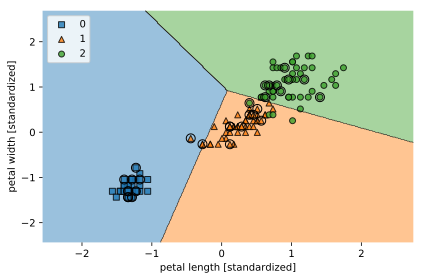

In [17]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, X_highlight=X_test_std,
                      clf=ppn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

Dataset - Pokemon with Stats

In [18]:
pkmn = pd.read_csv("../Datasets/Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()
pkmn.head()

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0    318  45      49       49       65       65     45          0
1    405  60      62       63       80       80     60          0
2    525  80      82       83      100      100     80          0
3    625  80     100      123      122      120     80          0
4    309  39      52       43       60       50     65          0

In [19]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]

In [20]:
sns.pairplot(pkmn,height = 3,hue="Legendary",palette="husl")

/Users/vish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [22]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
ppn = Perceptron(n_iter=100, eta0=0.1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
report(y_pred, y_test, [str(i) for i in list(set(y))])

Confusion Matrix:

 [[133  14]
 [  1  12]]


Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.90      0.95       147
           1       0.46      0.92      0.62        13

   micro avg       0.91      0.91      0.91       160
   macro avg       0.73      0.91      0.78       160
weighted avg       0.95      0.91      0.92       160

Accuracy:90.62%
Misclassified samples: 15


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


As we can see above, the accuracy is 93.12% but the recall for target class '1', is very low (0.69), i.e our model poorly recognizes actual legendary pokemon as legendary, and rather misclassifies them as baseline. This is due to the fact thte the dataset we have being unbalanced, where 0's dominate more than 1's. That is, there are fewer legendary pokemon than baseline ones, which is logical as they are rare - legendary. But that will not help our model correctly train itself to identify legendary pokemon, as it has an overexposure to baseline pokemon. To normalize this we have to resample the dataset, make synthetic samples (oversampling) and reduce some samples (undersampling) using techniques - SMOTE and Tomek links. The revised procedure is done below. 

In [24]:
from imblearn.combine import SMOTETomek
import collections
smt = SMOTETomek(sampling_strategy='auto', random_state=1)
X_smt, Y_smt = smt.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_smt, Y_smt, test_size=0.2, random_state=10)
collections.Counter(Y_smt)

Counter({0: 735, 1: 735})

In [25]:
ppn = Perceptron(n_iter=1000, eta0=0.1)
ppn.fit(X_train, y_train)

y_pred = ppn.predict(X_test)
report(y_pred, y_test, [str(i) for i in list(set(y))])

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Confusion Matrix:

 [[129  11]
 [ 26 128]]


Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.92      0.87       140
           1       0.92      0.83      0.87       154

   micro avg       0.87      0.87      0.87       294
   macro avg       0.88      0.88      0.87       294
weighted avg       0.88      0.87      0.87       294

Accuracy:87.41%
Misclassified samples: 37


Clearly, the over and under sampling has improved precision and recall and the f1 score, and we have successfully created a good perceptron model for our pokemon dataset.